In [1]:
#What about rate of shootings
#What is the rate of killings relative to race and age
#Which states have the most kills
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score


In [2]:
%matplotlib inline
rcParams['figure.figsize']=10,8
sb.set_style('whitegrid')

In [3]:
add='C:\\Users\\Prashant\\Desktop\\Data science practice\\fatal-police-shootings-data.csv'
data=pd.read_csv(add)
data.columns=['id','name','date','manner_of_death','armed','age','gender','race','city','state','mental_illness','threat_level','flee','body_camera']

In [4]:
data[['year','month','day']]=data.date.str.split('-',expand=True)#splitting date(object) and adding'year','month','day'
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,mental_illness,threat_level,flee,body_camera,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,01,02
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,01,02
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,01,03
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,01,04
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,01,04


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5416 non-null   int64  
 1   name             5416 non-null   object 
 2   date             5416 non-null   object 
 3   manner_of_death  5416 non-null   object 
 4   armed            5189 non-null   object 
 5   age              5181 non-null   float64
 6   gender           5414 non-null   object 
 7   race             4895 non-null   object 
 8   city             5416 non-null   object 
 9   state            5416 non-null   object 
 10  mental_illness   5416 non-null   bool   
 11  threat_level     5416 non-null   object 
 12  flee             5167 non-null   object 
 13  body_camera      5416 non-null   bool   
 14  year             5416 non-null   object 
 15  month            5416 non-null   object 
 16  day              5416 non-null   object 
dtypes: bool(2), fl

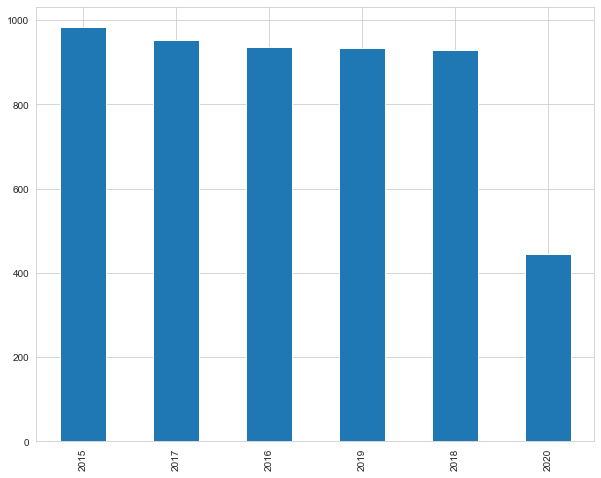

In [65]:
year_rate=data['year'].value_counts().plot(kind='bar')

In [7]:
uni_yr=year_rate.nunique()

In [8]:
x=sum(year_rate)
print(x)
rpy=x/uni_yr
rpy#rate of killings per year

5416


902.6666666666666

In [9]:
data_1=data.copy()
data_2=data.copy()
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5416 non-null   int64  
 1   name             5416 non-null   object 
 2   date             5416 non-null   object 
 3   manner_of_death  5416 non-null   object 
 4   armed            5189 non-null   object 
 5   age              5181 non-null   float64
 6   gender           5414 non-null   object 
 7   race             4895 non-null   object 
 8   city             5416 non-null   object 
 9   state            5416 non-null   object 
 10  mental_illness   5416 non-null   bool   
 11  threat_level     5416 non-null   object 
 12  flee             5167 non-null   object 
 13  body_camera      5416 non-null   bool   
 14  year             5416 non-null   object 
 15  month            5416 non-null   object 
 16  day              5416 non-null   object 
dtypes: bool(2), fl

In [10]:
data_1.dropna(subset=['race'], inplace=True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 0 to 5413
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4895 non-null   int64  
 1   name             4895 non-null   object 
 2   date             4895 non-null   object 
 3   manner_of_death  4895 non-null   object 
 4   armed            4678 non-null   object 
 5   age              4810 non-null   float64
 6   gender           4894 non-null   object 
 7   race             4895 non-null   object 
 8   city             4895 non-null   object 
 9   state            4895 non-null   object 
 10  mental_illness   4895 non-null   bool   
 11  threat_level     4895 non-null   object 
 12  flee             4688 non-null   object 
 13  body_camera      4895 non-null   bool   
 14  year             4895 non-null   object 
 15  month            4895 non-null   object 
 16  day              4895 non-null   object 
dtypes: bool(2), fl

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5416 non-null   int64  
 1   name             5416 non-null   object 
 2   date             5416 non-null   object 
 3   manner_of_death  5416 non-null   object 
 4   armed            5189 non-null   object 
 5   age              5181 non-null   float64
 6   gender           5414 non-null   object 
 7   race             4895 non-null   object 
 8   city             5416 non-null   object 
 9   state            5416 non-null   object 
 10  mental_illness   5416 non-null   bool   
 11  threat_level     5416 non-null   object 
 12  flee             5167 non-null   object 
 13  body_camera      5416 non-null   bool   
 14  year             5416 non-null   object 
 15  month            5416 non-null   object 
 16  day              5416 non-null   object 
dtypes: bool(2), fl

In [12]:
spr=data_1.groupby(['race','year']).count()
spr[0:1]

,,id,name,date,manner_of_death,armed,age,gender,city,state,mental_illness,threat_level,flee,body_camera,month,day
race,year,,,,,,,,,,,,,,,
A,2015,14,14,14,14,13,13,14,14,14,14,14,14,14,14,14


In [13]:
race_rate=data_1['race'].value_counts()
race_rate

W    2476
B    1298
H     902
A      93
N      78
O      48
Name: race, dtype: int64

In [14]:
racepy=race_rate/6
racepy

W    412.666667
B    216.333333
H    150.333333
A     15.500000
N     13.000000
O      8.000000
Name: race, dtype: float64

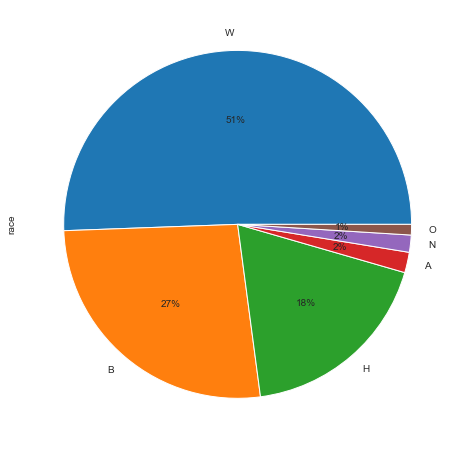

In [15]:
plot=racepy.plot.pie(y='racerate',autopct='%1.0f%%')

In [16]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,mental_illness,threat_level,flee,body_camera,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,01,02
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,01,02
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,01,03
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,01,04
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,01,04


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5416 non-null   int64  
 1   name             5416 non-null   object 
 2   date             5416 non-null   object 
 3   manner_of_death  5416 non-null   object 
 4   armed            5189 non-null   object 
 5   age              5181 non-null   float64
 6   gender           5414 non-null   object 
 7   race             4895 non-null   object 
 8   city             5416 non-null   object 
 9   state            5416 non-null   object 
 10  mental_illness   5416 non-null   bool   
 11  threat_level     5416 non-null   object 
 12  flee             5167 non-null   object 
 13  body_camera      5416 non-null   bool   
 14  year             5416 non-null   object 
 15  month            5416 non-null   object 
 16  day              5416 non-null   object 
dtypes: bool(2), fl

In [18]:
data.dropna(subset=['age'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5181 non-null   int64  
 1   name             5181 non-null   object 
 2   date             5181 non-null   object 
 3   manner_of_death  5181 non-null   object 
 4   armed            4960 non-null   object 
 5   age              5181 non-null   float64
 6   gender           5180 non-null   object 
 7   race             4810 non-null   object 
 8   city             5181 non-null   object 
 9   state            5181 non-null   object 
 10  mental_illness   5181 non-null   bool   
 11  threat_level     5181 non-null   object 
 12  flee             4950 non-null   object 
 13  body_camera      5181 non-null   bool   
 14  year             5181 non-null   object 
 15  month            5181 non-null   object 
 16  day              5181 non-null   object 
dtypes: bool(2), fl

In [19]:
age_rate=data['age'].value_counts()
age_rate

31.0    186
25.0    183
33.0    171
27.0    171
29.0    169
       ... 
89.0      1
12.0      1
78.0      1
13.0      1
79.0      1
Name: age, Length: 77, dtype: int64

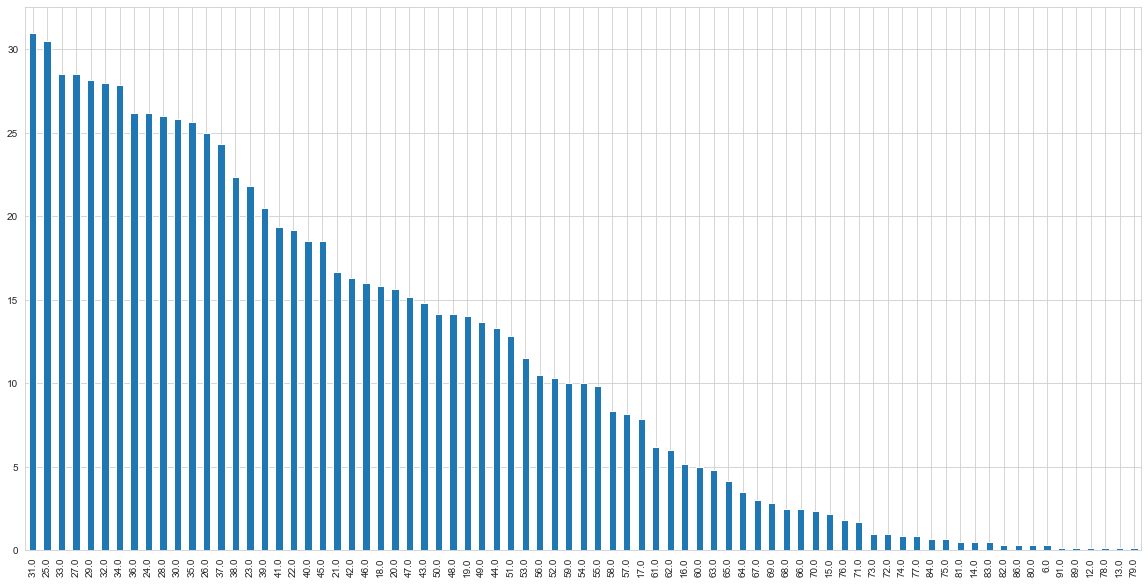

In [20]:
agepy=age_rate/6
agepy.plot(kind='bar',figsize=[20,10])

(30, 40]    1517
(20, 30]    1487
(40, 50]     933
(50, 60]     579
(10, 20]     369
(60, 70]     227
(70, 80]      51
(80, 90]      15
(0, 10]        2
Name: age, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


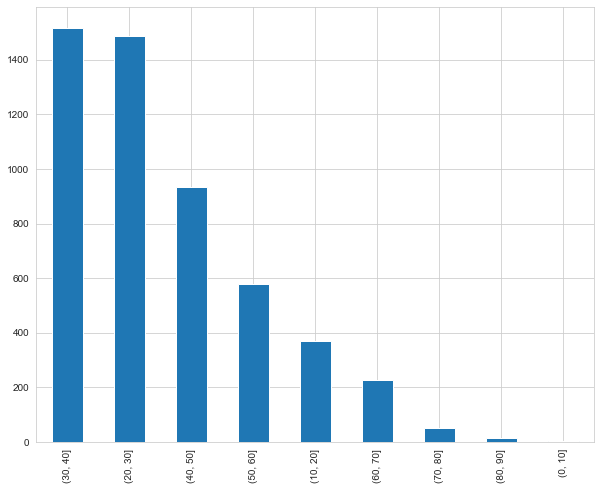

In [21]:
bins = [0,10,20,30,40,50,60,70,80,90]
s = pd.cut(data['age'], bins=bins).value_counts()
print(s)
print(s.plot(kind='bar',))

In [60]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5416 non-null   int64  
 1   name             5416 non-null   object 
 2   date             5416 non-null   object 
 3   manner_of_death  5416 non-null   object 
 4   armed            5189 non-null   object 
 5   age              5181 non-null   float64
 6   gender           5414 non-null   object 
 7   race             4895 non-null   object 
 8   city             5416 non-null   object 
 9   state            5416 non-null   object 
 10  mental_illness   5416 non-null   bool   
 11  threat_level     5416 non-null   object 
 12  flee             5167 non-null   object 
 13  body_camera      5416 non-null   bool   
 14  year             5416 non-null   object 
 15  month            5416 non-null   object 
 16  day              5416 non-null   object 
dtypes: bool(2), fl

CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
OH    155
WA    152
Name: state, dtype: int64


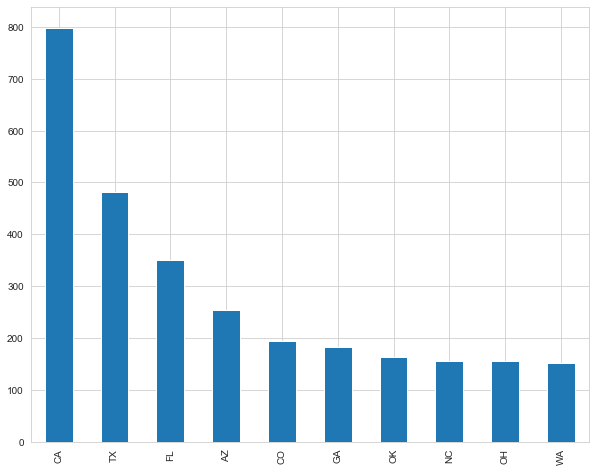

In [61]:
state_rate=data_2['state'].value_counts()
state_rate.nlargest(10).plot.bar()
print(state_rate[:10])

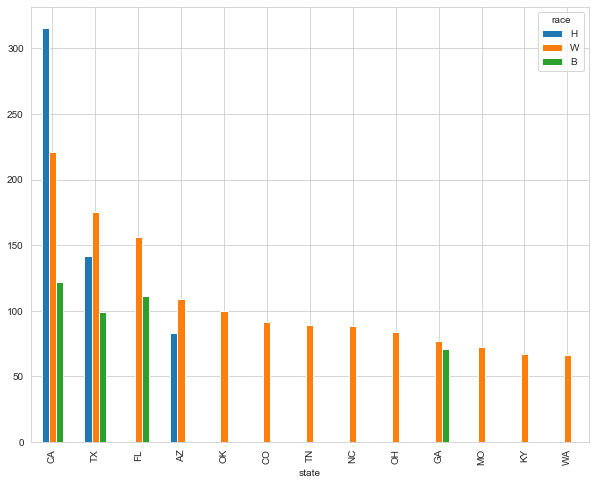

In [29]:
data_2.groupby(['state','race'])['state'].size().nlargest(20).unstack().plot.bar()